## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Basic Checks

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
for col in df:
    print('*'*20, col, '*'*20)
    print(df[col].unique())

******************** customerID ********************
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
******************** gender ********************
['Female' 'Male']
******************** SeniorCitizen ********************
[0 1]
******************** Partner ********************
['Yes' 'No']
******************** Dependents ********************
['No' 'Yes']
******************** tenure ********************
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
******************** PhoneService ********************
['No' 'Yes']
******************** MultipleLines ********************
['No phone service' 'No' 'Yes']
******************** InternetService ********************
['DSL' 'Fiber optic' 'No']
******************** OnlineSecurity ********************
['No' 'Yes' 'No internet service'

## Data Cleaning

In [7]:
df = df.iloc[:, 1:]

In [8]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x==1 else 'No')

In [9]:
df['MultipleLines'] = df['MultipleLines'].str.replace('No phone service', 'No')

In [10]:
df['OnlineSecurity'] = df['OnlineSecurity'].str.replace('No internet service', 'No')

In [11]:
df['OnlineBackup'] = df['OnlineBackup'].str.replace('No internet service', 'No')

In [12]:
df['DeviceProtection'] = df['DeviceProtection'].str.replace('No internet service', 'No')

In [13]:
df['TechSupport'] = df['TechSupport'].str.replace('No internet service', 'No')

In [14]:
df['StreamingTV'] = df['StreamingTV'].str.replace('No internet service', 'No')

In [15]:
df['StreamingMovies'] = df['StreamingMovies'].str.replace('No internet service', 'No')

In [16]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace('Bank transfer (automatic)', 'Bank transfer').str.replace('Credit card (automatic)', 'Credit card')

In [17]:
df['tenure'] = df['tenure'].apply(lambda x: 'Basic' if x<=12 else ('Basic +' if x<=30 else ('Pro' if x<=48 else 'Loyal')))

In [18]:
for col in df:
    print('*'*20, col, '*'*20)
    print(df[col].unique())

******************** gender ********************
['Female' 'Male']
******************** SeniorCitizen ********************
['No' 'Yes']
******************** Partner ********************
['Yes' 'No']
******************** Dependents ********************
['No' 'Yes']
******************** tenure ********************
['Basic' 'Pro' 'Basic +' 'Loyal']
******************** PhoneService ********************
['No' 'Yes']
******************** MultipleLines ********************
['No' 'Yes']
******************** InternetService ********************
['DSL' 'Fiber optic' 'No']
******************** OnlineSecurity ********************
['No' 'Yes']
******************** OnlineBackup ********************
['Yes' 'No']
******************** DeviceProtection ********************
['No' 'Yes']
******************** TechSupport ********************
['No' 'Yes']
******************** StreamingTV ********************
['No' 'Yes']
******************** StreamingMovies ********************
['No' 'Yes']
***************

In [19]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [20]:
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '')
df['TotalCharges'] = df['TotalCharges'].str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [22]:
df['TotalCharges'].isnull().sum()

11

In [23]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [24]:
df['TotalCharges'].isnull().sum()

0

## Data Exploration

In [25]:
def univariate_cat(df):
    for col in df:
        print('*'*20, col, '*'*20)
        print(df[col].apply(['count', 'nunique', 'unique']))
        print(df[col].value_counts())
        print()

def univariate_num(df):
    for col in df:
        print('*'*20, col, '*'*20)
        print(df[col].apply(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurt']))
        print()

In [26]:
num_df = df.select_dtypes(include='float64')
cat_df = df.select_dtypes(include='object')

### Univariate Analysis

In [27]:
univariate_cat(cat_df)

******************** gender ********************
count                7043
nunique                 2
unique     [Female, Male]
Name: gender, dtype: object
gender
Male      3555
Female    3488
Name: count, dtype: int64

******************** SeniorCitizen ********************
count           7043
nunique            2
unique     [No, Yes]
Name: SeniorCitizen, dtype: object
SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

******************** Partner ********************
count           7043
nunique            2
unique     [Yes, No]
Name: Partner, dtype: object
Partner
No     3641
Yes    3402
Name: count, dtype: int64

******************** Dependents ********************
count           7043
nunique            2
unique     [No, Yes]
Name: Dependents, dtype: object
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

******************** tenure ********************
count                              7043
nunique                               4
unique     [Basic, Pro

In [28]:
univariate_num(num_df)

******************** MonthlyCharges ********************
min        18.250000
max       118.750000
mean       64.761692
median     70.350000
std        30.090047
skew       -0.220524
kurt       -1.257260
Name: MonthlyCharges, dtype: float64

******************** TotalCharges ********************
min          0.000000
max       8684.800000
mean      2279.734304
median    1394.550000
std       2266.794470
skew         0.963235
kurt        -0.228580
Name: TotalCharges, dtype: float64



<Axes: xlabel='Churn', ylabel='count'>

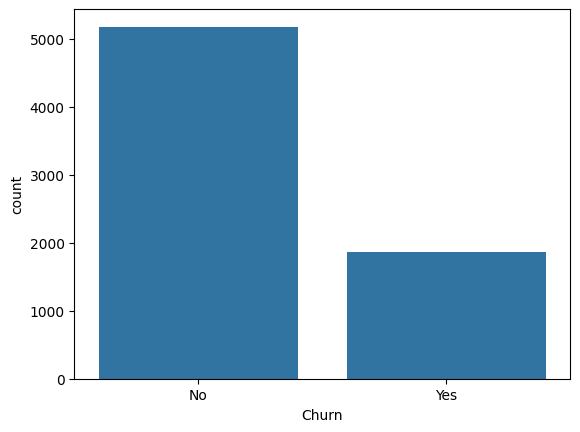

In [29]:
# Churn
sns.countplot(data=df, x='Churn')

<Axes: xlabel='gender', ylabel='count'>

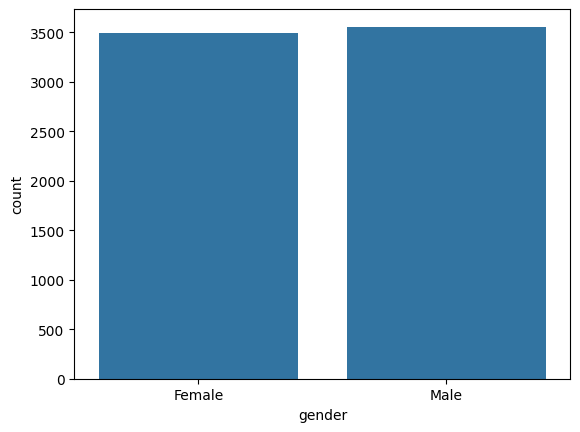

In [30]:
# Gender
sns.countplot(df, x='gender')

<Axes: xlabel='tenure', ylabel='count'>

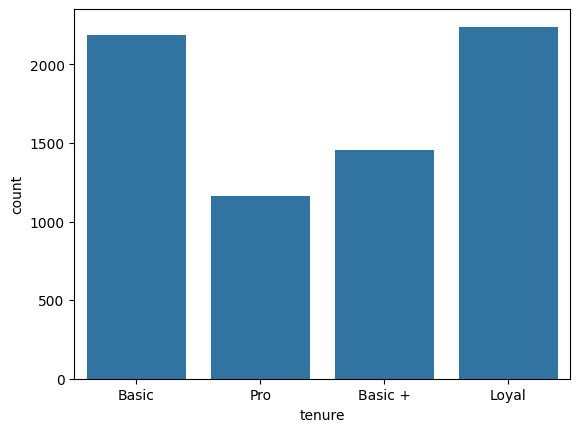

In [31]:
# Tenure
sns.countplot(df, x='tenure')

<Axes: xlabel='Contract', ylabel='count'>

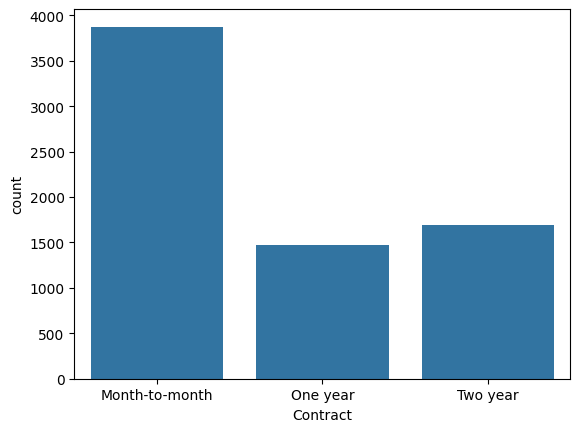

In [32]:
# Contract
sns.countplot(df, x='Contract')

<Axes: xlabel='SeniorCitizen', ylabel='count'>

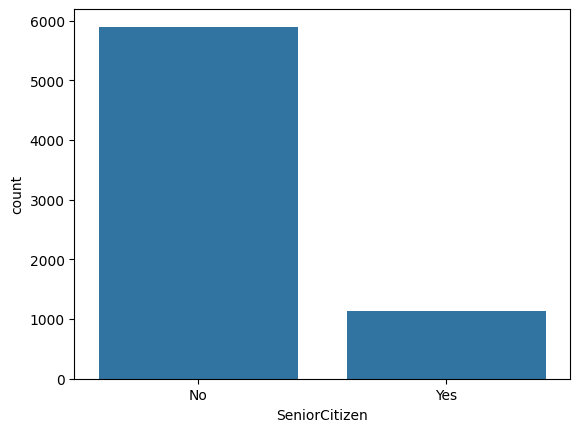

In [33]:
sns.countplot(df, x='SeniorCitizen')

<Axes: xlabel='Partner', ylabel='count'>

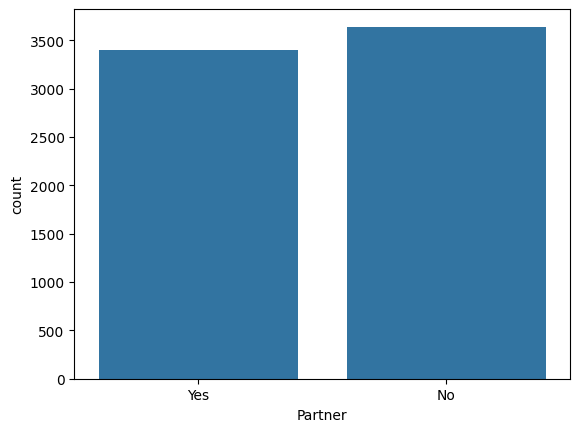

In [34]:
sns.countplot(df, x='Partner')

<Axes: xlabel='PaymentMethod', ylabel='count'>

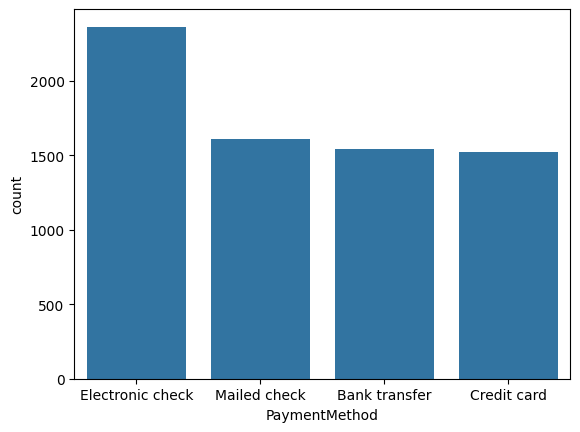

In [35]:
sns.countplot(df, x='PaymentMethod')

In [36]:
cat_df.columns[1:]

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

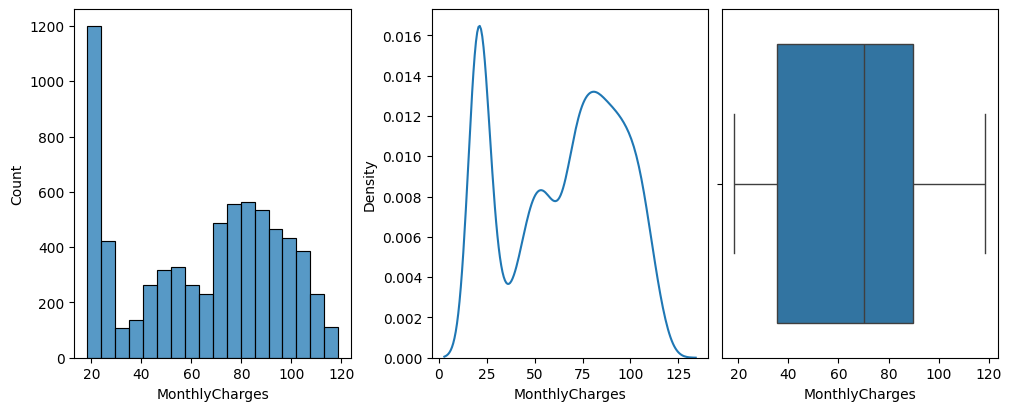

In [37]:
fig, axs = plt.subplots(1, 3,figsize=(10, 4), constrained_layout=True)
sns.histplot(df, x='MonthlyCharges', ax=axs[0])
sns.kdeplot(df, x='MonthlyCharges', ax=axs[1])
sns.boxplot(df, x='MonthlyCharges', ax=axs[2])

plt.show()

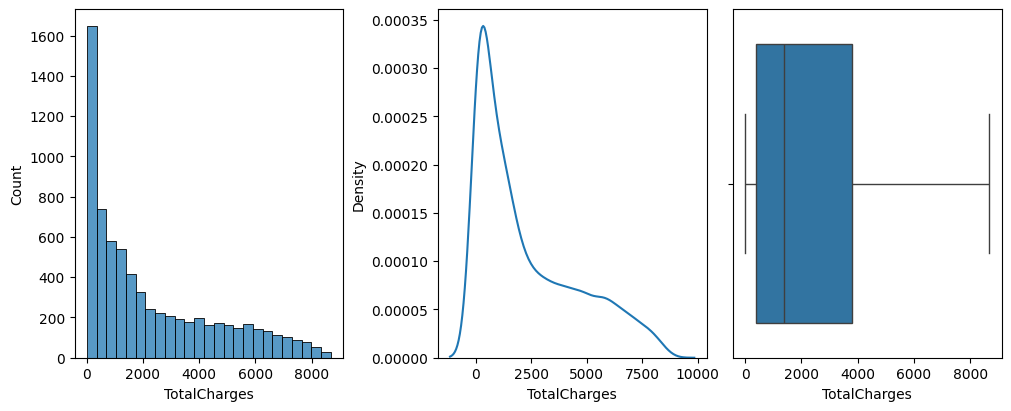

In [38]:
fig, axs = plt.subplots(1, 3,figsize=(10, 4), constrained_layout=True)
sns.histplot(df, x='TotalCharges', ax=axs[0])
sns.kdeplot(df, x='TotalCharges', ax=axs[1])
sns.boxplot(df, x='TotalCharges', ax=axs[2])

plt.show()

### Bivariate

In [39]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

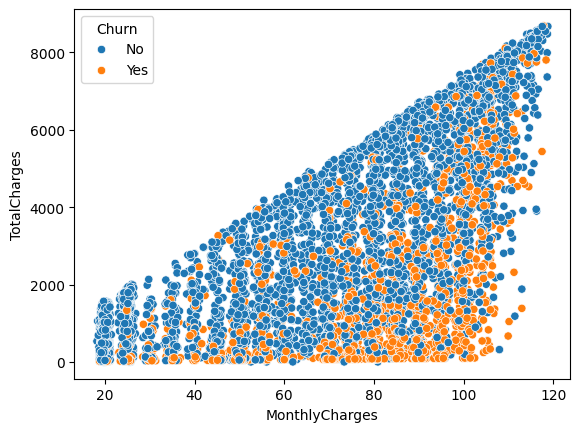

In [40]:
sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

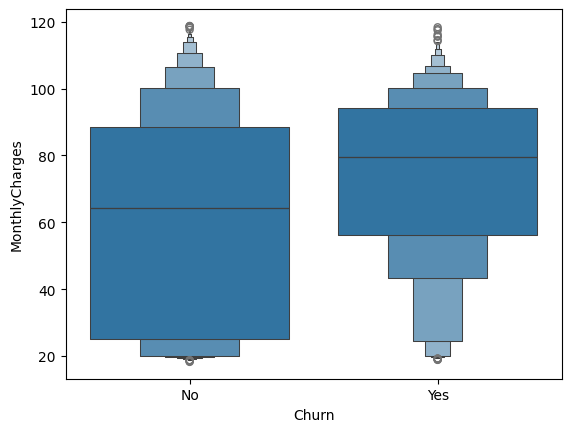

In [41]:
sns.boxenplot(df, x='Churn', y='MonthlyCharges')

## 1. Identify Input (x) and Target (y)

In [42]:
y = df.pop('Churn')
X = df

In [43]:
X.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,Basic,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,Pro,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,Basic,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,Pro,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75
4,Female,No,No,No,Basic,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [44]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

## Train, Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=54)

In [47]:
print(X_train.shape, y_train.shape, sep='\n')

(5282, 19)
(5282,)


In [48]:
print(X_test.shape, y_test.shape, sep='\n')

(1761, 19)
(1761,)


In [49]:
X_train_num = X_train.select_dtypes(include=['int', 'float'])
X_train_cat = X_train.select_dtypes(include='object')

In [50]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 392 to 898
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  5282 non-null   float64
 1   TotalCharges    5282 non-null   float64
dtypes: float64(2)
memory usage: 123.8 KB


In [51]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 392 to 898
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            5282 non-null   object
 1   SeniorCitizen     5282 non-null   object
 2   Partner           5282 non-null   object
 3   Dependents        5282 non-null   object
 4   tenure            5282 non-null   object
 5   PhoneService      5282 non-null   object
 6   MultipleLines     5282 non-null   object
 7   InternetService   5282 non-null   object
 8   OnlineSecurity    5282 non-null   object
 9   OnlineBackup      5282 non-null   object
 10  DeviceProtection  5282 non-null   object
 11  TechSupport       5282 non-null   object
 12  StreamingTV       5282 non-null   object
 13  StreamingMovies   5282 non-null   object
 14  Contract          5282 non-null   object
 15  PaperlessBilling  5282 non-null   object
 16  PaymentMethod     5282 non-null   object
dtypes: object(17)
memo

## Data Preparation for Train Data

In [52]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed

,MonthlyCharges,TotalCharges
392,-0.691738,-0.962242
3206,-1.504531,-0.953468
3926,-1.012841,-0.832509
495,-0.710134,-0.603223
6573,-0.467634,-0.003211
...,...,...
3392,-0.698427,0.062283
3809,-1.499514,-0.565548
5143,0.743194,0.914067
3855,0.000642,0.481462


In [53]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed

Shape of Data before Transformation: (5282, 17)
Shape of Data after Transformation: (5282, 23)


,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,tenure_Basic +,tenure_Loyal,tenure_Pro,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
392,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3926,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
495,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6573,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3392,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3809,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5143,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3855,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)

In [55]:
X_train_transformed

,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,tenure_Basic +,tenure_Loyal,tenure_Pro,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
392,-0.691738,-0.962242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3206,-1.504531,-0.953468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3926,-1.012841,-0.832509,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
495,-0.710134,-0.603223,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6573,-0.467634,-0.003211,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3392,-0.698427,0.062283,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3809,-1.499514,-0.565548,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5143,0.743194,0.914067,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3855,0.000642,0.481462,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Data Preparation For Test Data

In [56]:
X_test_num = X_test.select_dtypes(include=['int', 'float'])
X_test_cat = X_test.select_dtypes(include='object')

In [57]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

scaler_test = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_test_num_transformed = pd.DataFrame(scaler_test.fit_transform(X_test_num), 
                                    columns = scaler_test.get_feature_names_out(), 
                                    index = X_test_num.index)

X_test_num_transformed

,MonthlyCharges,TotalCharges
5929,0.815665,1.465399
5765,1.058777,1.891396
1732,1.138727,1.620572
6472,0.980459,1.550943
5274,1.435682,2.156671
...,...,...
627,1.321469,1.996414
1174,-0.321576,-0.676565
1456,1.171359,-0.339892
5014,-0.385210,0.646098


In [58]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_test_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)

print("Shape of Data before Transformation:", X_test_cat.shape)
print("Shape of Data after Transformation:", X_test_cat_tansformed.shape)

X_test_cat_tansformed

Shape of Data before Transformation: (1761, 17)
Shape of Data after Transformation: (1761, 23)


,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,tenure_Basic +,tenure_Loyal,tenure_Pro,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
5929,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5765,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1732,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6472,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5274,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1456,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5014,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [59]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)

X_test_transformed

,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,tenure_Basic +,tenure_Loyal,tenure_Pro,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
5929,0.815665,1.465399,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5765,1.058777,1.891396,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1732,1.138727,1.620572,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6472,0.980459,1.550943,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5274,1.435682,2.156671,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,1.321469,1.996414,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1174,-0.321576,-0.676565,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1456,1.171359,-0.339892,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5014,-0.385210,0.646098,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Training Model

In [61]:
### KNN

In [62]:
pipe_knn = Pipeline( [
                        ('classifier', KNeighborsClassifier())
                        ]
                    )

N_NEIGHBORS = [i for i in range(3, 21, 2)]
P = [1, 2, 3]

# Observe the Key Value Pair format
parameter_grid_knn = [
    {
        
        'classifier__n_neighbors' : N_NEIGHBORS,              
        'classifier__p' : P
    }
]

clf_knn = GridSearchCV(
    estimator=pipe_knn, 
    param_grid=parameter_grid_knn, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf_knn.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 9min 18s
Wall time: 5min 18s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                          'classifier__p': [1, 2, 3]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [63]:
print("Best estimator found on train set")
print(clf_knn.best_estimator_)
print()

print('Score on Test Data: ', clf_knn.score(X_test_transformed, y_test))

Best estimator found on train set
Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=19, p=3))])

Score on Test Data:  0.7808063600227144


In [64]:
import joblib

In [65]:
pipelines = {
    'knn' : Pipeline([
        ('classifier', KNeighborsClassifier())
    ]), 
    'logistic_regression': Pipeline([
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        ('classifier', DecisionTreeClassifier())
    ])
}

In [66]:
param_grids = {
    'knn': [
        {
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)], 
            'classifier__p' : [1, 2, 3]
        }
    ],
    
    'logistic_regression': [
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest': [
        {
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'decision_tree': [
        {
            'classifier__max_depth': [None, 5, 10]
        }
    ]
}


In [67]:
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_transformed, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_transformed, y_test))
    joblib.dump(grid_search, f'{algo}_algorithem.pkl')

********** knn **********
Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 9min 31s
Wall time: 5min 7s
Score on Test Data:  0.7808063600227144
********** logistic_regression **********
Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: total: 11.8 s
Wall time: 11.7 s
Score on Test Data:  0.7955706984667802
********** random_forest **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 13.2 s
Wall time: 13.8 s
Score on Test Data:  0.7808063600227144
********** decision_tree **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 562 ms
Wall time: 566 ms
Score on Test Data:  0.7864849517319704


In [68]:
best_models

{'knn': Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=19, p=3))]),
 'logistic_regression': Pipeline(steps=[('classifier', LogisticRegression(C=1))]),
 'random_forest': Pipeline(steps=[('classifier', RandomForestClassifier())]),
 'decision_tree': Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=5))])}